# ECSE 415: Assignment 1
## Imad Dodin | 260713381
### Notes:

* Only libraries installed in the tutorials were used in this assignment - for simplicity, I've frozen them into requirements.txt for the grader's reference.
* Following instructions on the assignment, images are expected to be placed on the same directory as this file and named identically to the starter directory provided. 

### Acknowledgements: 
I refer to code from the class tutorials to accomplish the required tasks. All comments are my own work.

In [76]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Denoising

### Gaussian Noise Corruption

#### Questions 1, 2 and 3

*Please note that comments on PSNR are printed below the rendered images*

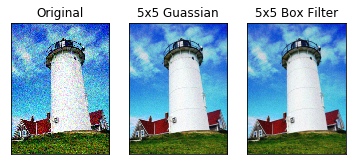

Gaussian Filter has a higher PSNR (therefore gives a better result) than Box Filter by a value of 0.676892290692205 
(PSNR(Gaussian) = 20.399265873547897, PSNR(Box) = 19.722373582855692)


In [92]:
# Loading the image 
image_path = "./gaussian_lighthouse.png"
img = cv2.imread(image_path)

# 5x5 Gaussian 
gauss = cv2.GaussianBlur(img, (5,5), 2**0.5)

# Constructing the box filter
box = np.ones((5,5), np.float32)/(5*5)
# Apply
boxf= cv2.filter2D(img, -1, box)

# Convert channels
boxf2 = cv2.cvtColor(boxf, cv2.COLOR_BGR2RGB)
gauss2 = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot
plt.subplot(131), plt.imshow(img2)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gauss2)
plt.title("5x5 Guassian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(boxf2)
plt.title("5x5 Box Filter"), plt.xticks([]), plt.yticks([])
plt.show()

d_gauss = cv2.PSNR(imggauss)
d_box = cv2.PSNR(img, boxf)

print("Gaussian Filter has a higher PSNR (therefore gives a better result) than Box Filter by a value of {} \n(PSNR(Gaussian) = {}, PSNR(Box) = {})".format((d_gauss-d_box), d_gauss, d_box))

### Salt and Pepper Noise

#### Questions 4, 5 and 6

*Again, please note that comments on the PSNR are below the rendered images*

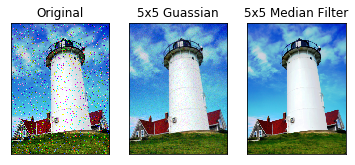

Gaussian Filter has a higher PSNR (therefore gives a better result) than Median Filter by a value of 0.6260672025482528 
(PSNR(Gaussian) = 17.74846599745517, PSNR(Median) = 17.122398794906918)


In [83]:
# Loading the image 
image_path = "./saltandpepper_lighthouse.png"
img = cv2.imread(image_path)

# 5x5 Gaussian 
gauss = cv2.GaussianBlur(img, (5,5), 2**0.5)

# Apply Median filter
med = cv2.medianBlur(img, 5)

# Convert channels
med = cv2.cvtColor(med, cv2.COLOR_BGR2RGB)
gauss = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot
plt.subplot(131), plt.imshow(img)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gauss)
plt.title("5x5 Guassian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(med)
plt.title("5x5 Median Filter"), plt.xticks([]), plt.yticks([])
plt.show()

d_gauss = cv2.PSNR(img, gauss)
d_med = cv2.PSNR(img, med)

print("Gaussian Filter has a higher PSNR (therefore gives a better result) than Median Filter by a value of {} \n(PSNR(Gaussian) = {}, PSNR(Median) = {})".format((d_gauss-d_med), d_gauss, d_med))

## 3. Sobel Edge Detector

### No Denoising

#### Question 1

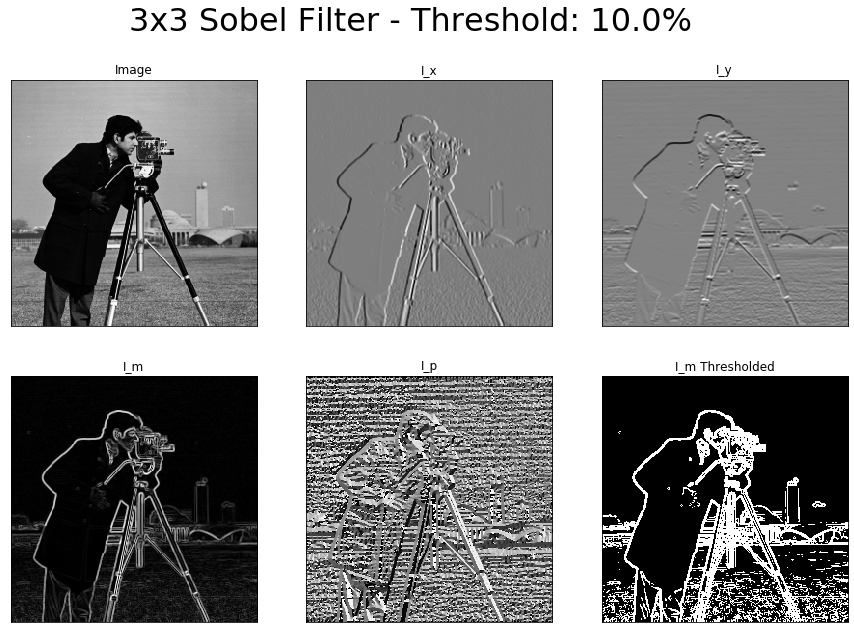

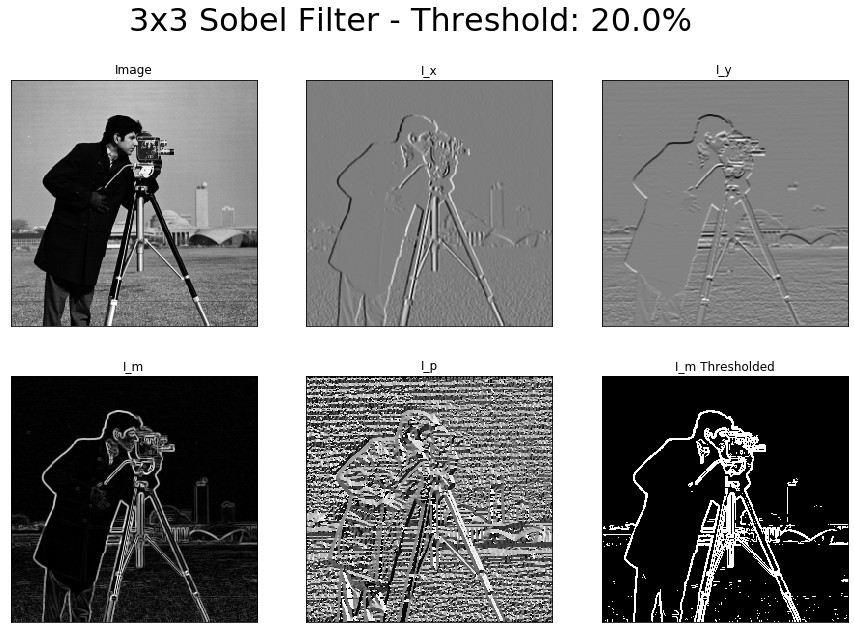

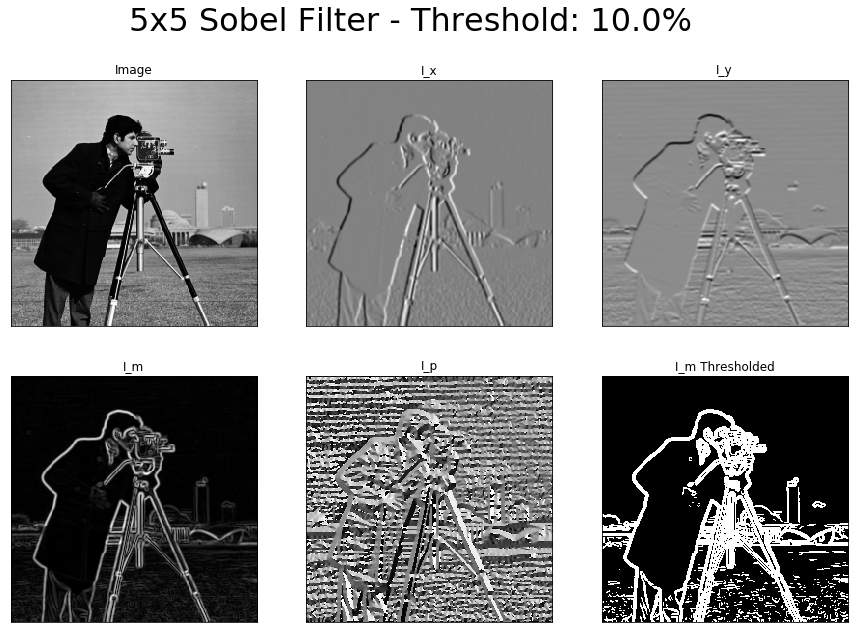

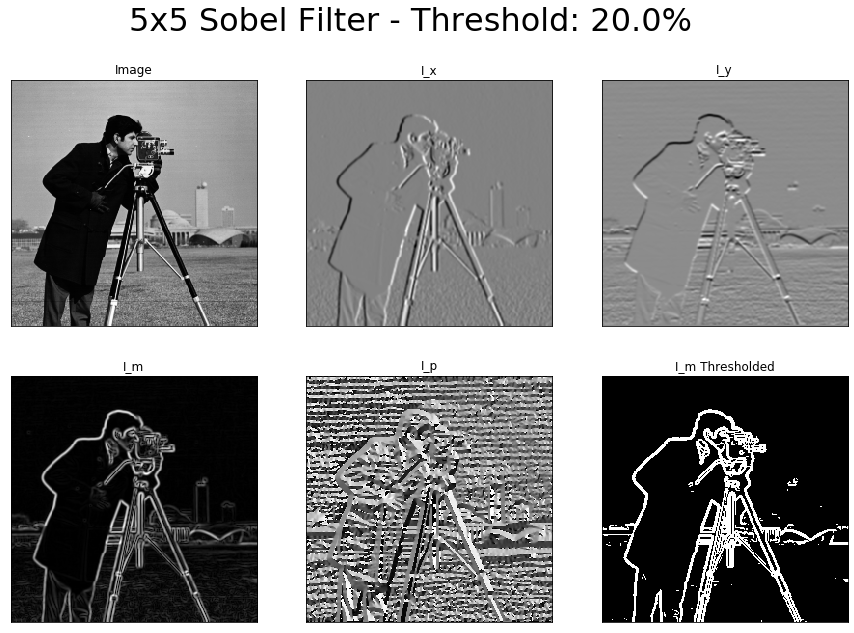

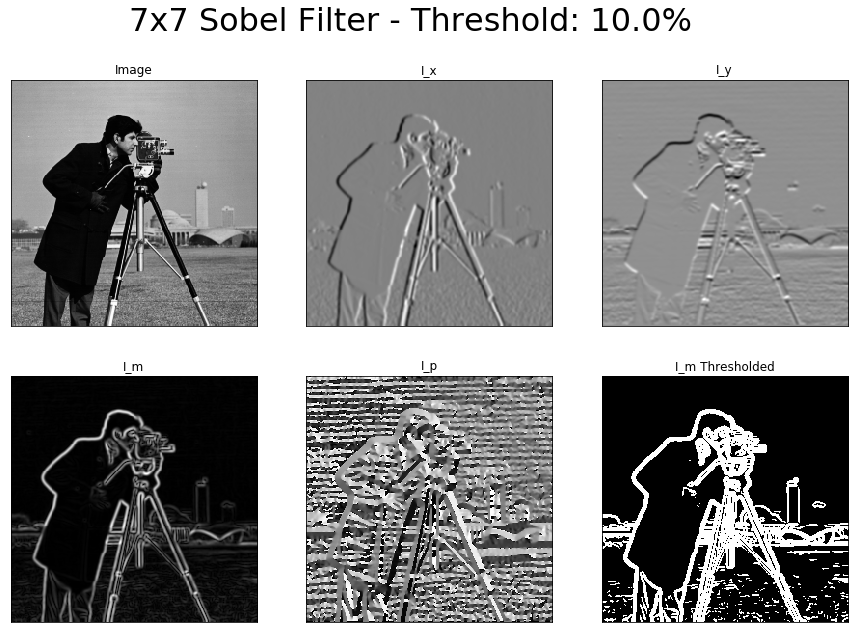

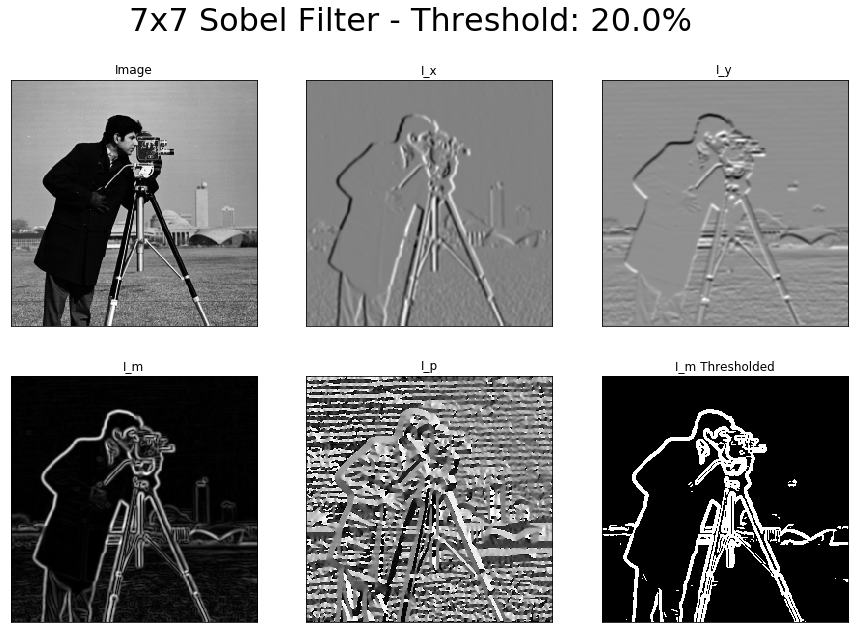

In [4]:
image_path = "cameraman.png"
kernel_sizes = [3, 5, 7]
thresh_factors = [0.1, 0.2]

def render_sobels(image_path, kernel_sizes, thresh_factors, box_size=None):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if box_size:
        # Constructing the box filter
        box = np.ones((5,5), np.float32)/(box_size**2)
        # Apply
        img = cv2.filter2D(img, -1, box)
    
    for k in kernel_sizes:
        for f in thresh_factors:
            # k x k Sobel in X and Y
            I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k)
            I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k)
            # Magnitude and Phase computations
            I_m = cv2.magnitude(I_x, I_y)
            I_p = cv2.phase(I_x, I_y)

            # Maximum and threshold
            p_max = np.max(I_m)
            ret,thresh = cv2.threshold(I_m, f*p_max, 255, cv2.THRESH_BINARY)

            # Render
            plt.figure(figsize=(15,10))
            plt.subplot(231), plt.imshow(img, cmap="gray")
            plt.title("Image"), plt.xticks([]), plt.yticks([])
            plt.subplot(232), plt.imshow(I_x, cmap="gray")
            plt.title("I_x"), plt.xticks([]), plt.yticks([])
            plt.subplot(233), plt.imshow(I_y, cmap="gray")
            plt.title("I_y"), plt.xticks([]), plt.yticks([])

            plt.subplot(234), plt.imshow(I_m, cmap="gray")
            plt.title("I_m"), plt.xticks([]), plt.yticks([])
            plt.subplot(235), plt.imshow(I_p, cmap="gray")
            plt.title("I_p"), plt.xticks([]), plt.yticks([])
            plt.subplot(236), plt.imshow(thresh, cmap="gray")
            plt.title("I_m Thresholded".format(f*100)), plt.xticks([]), plt.yticks([])
            plt.suptitle("{}x{} Sobel Filter - Threshold: {}% {}"
                         .format(k,
                                 k,
                                 100*f,
                                ("({}x{} Box Filter)".format(box_size,box_size) if box_size else "")),
                         fontsize=32)
            plt.show()

render_sobels(image_path, kernel_sizes, thresh_factors)

#### Question 2: Comment on the effect of filter size on the output.

As we increase Kernel size, we include more pixels in the convolution operation. As such, the edges that we render are blurred (simply put: bigger kernel sizes means bigger neighbourhood considered when applying kernel which in turn means that there are more pixel coordinates whereby edges would be detect and therefore we have more blurred edges.)

### Denoising before appyling Sobel

#### Questions 3 and 4

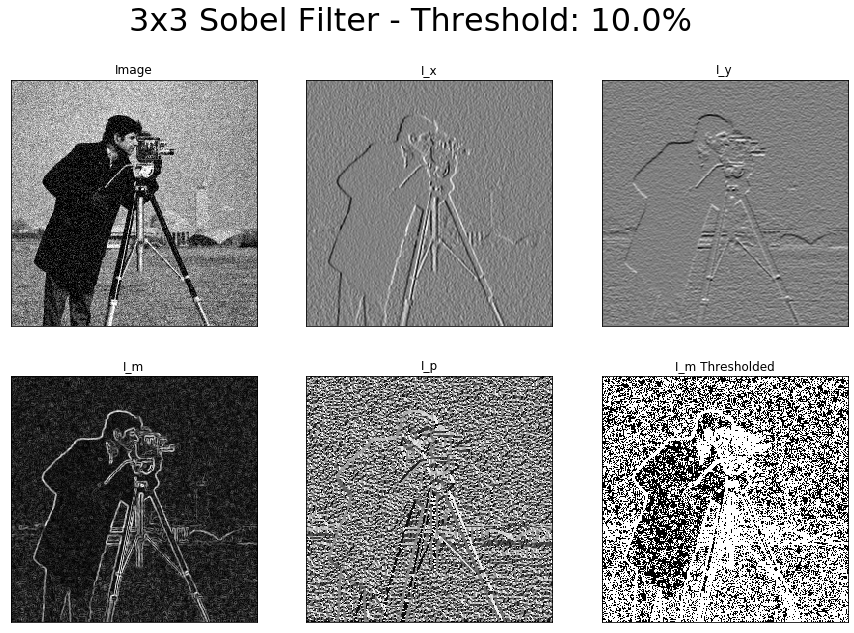

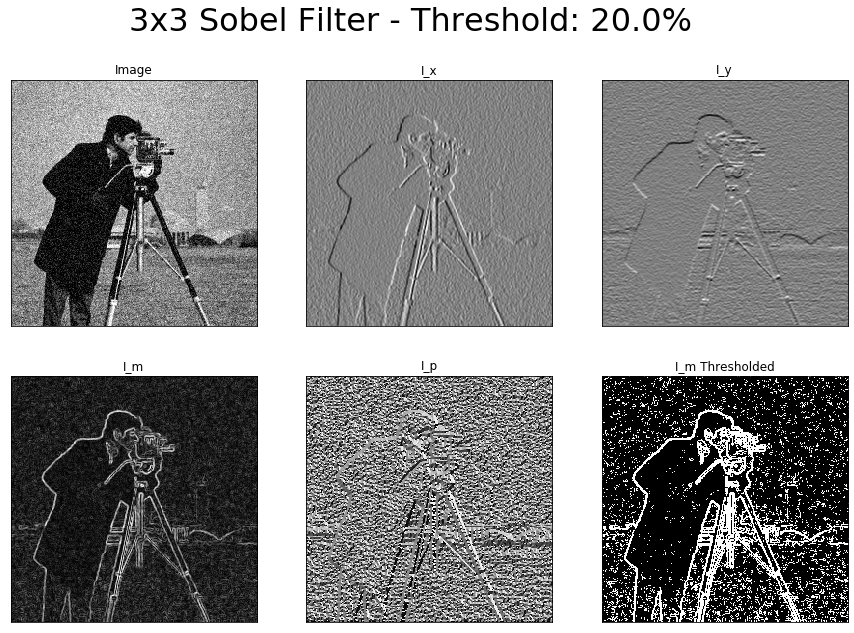

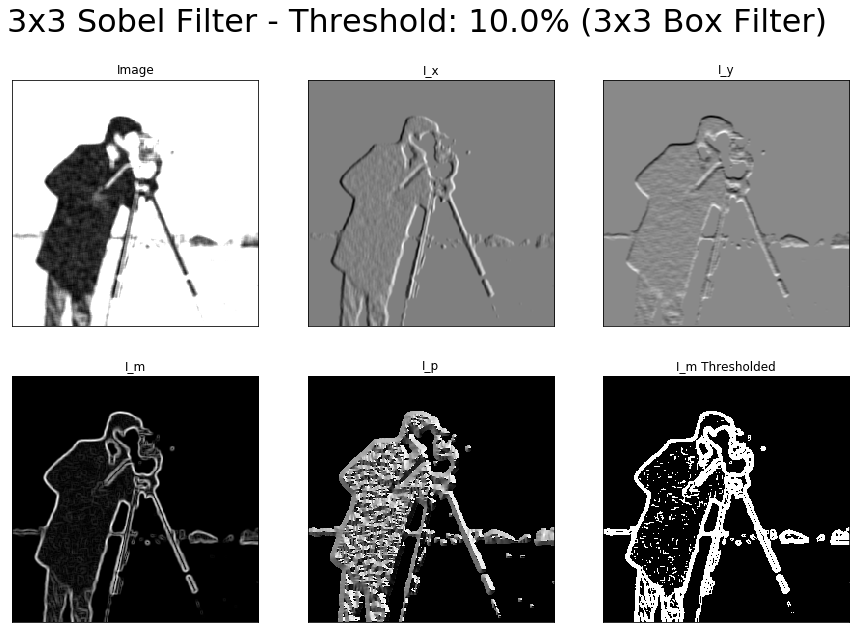

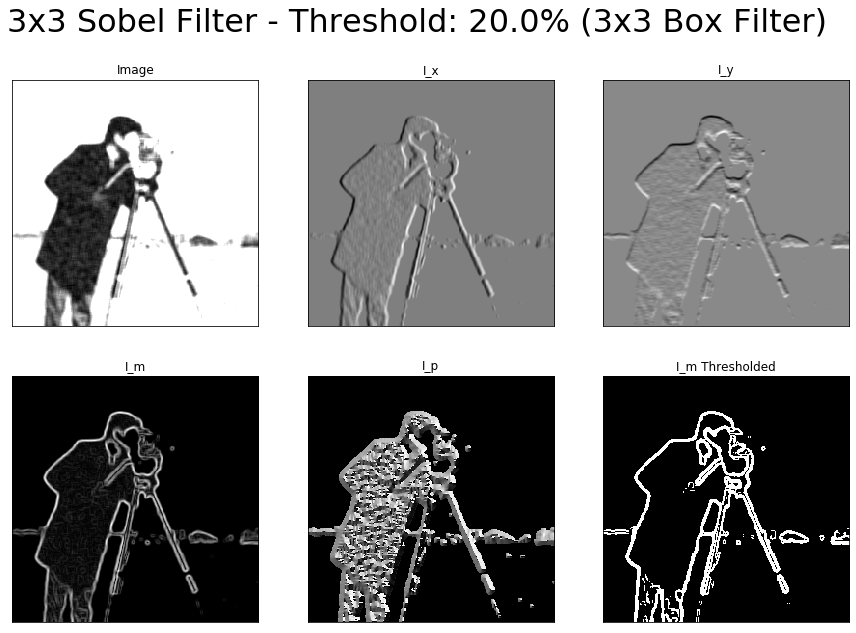

In [5]:
image_path = "gaussian_cameraman.png"
kernel_sizes = [3]
thresh_factors = [0.1, 0.2]

render_sobels(image_path, kernel_sizes, thresh_factors)

render_sobels(image_path, kernel_sizes, thresh_factors, 3)

#### Question 5: Comment on the effectiveness of using denoising prior to edge detection.

By denoising prior to computing gradients, we reduce "flecks" of white resulting from the Sobel Filter having considered the gradients of the noise in our resulting edge detection image and consequently get a cleaner edge detection render with significantly less flecks. However, we also note that more denoising (larger kernel size) blurs our iamge and that we consequently can't detect edges for the thinner edges in our image (e.g. the bottom of the camera base above), as the gradient on such thin edges is signficantly reduced by the denoising filter (which is, in this case, a mean of neighbourhood operation). In addition, when we denoise, we get blurred edges (as we increase kernel size), resulting in thicker lines. 

## 4. Laplacian of Gaussian
### Filtering
#### Question 1 and 2
N.b. Zero-crossing edge detection with various thresholds as assignment was unclear about thresholding

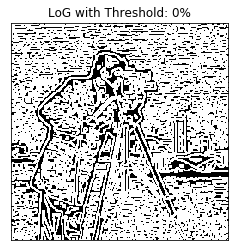

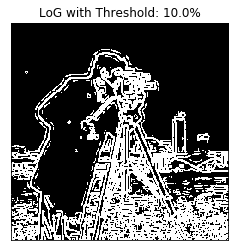

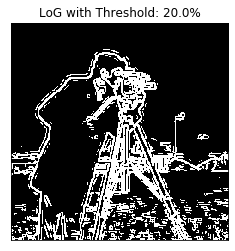

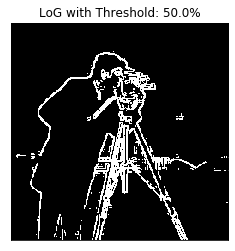

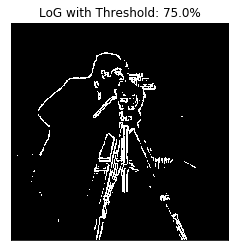

In [46]:
image_path = "cameraman.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

I_gauss = cv2.GaussianBlur(img, (5,5), 0)
I_log = cv2.Laplacian(I_gauss, cv2.CV_32F, ksize=5)


p_max = np.max(I_log)
thresholds = [0, 0.1, 0.2, 0.5, 0.75]

for idx, f in enumerate(thresholds):
    I_log2 = I_log.copy()
    for i in range(1, I_log.shape[0]-1):
        for j in range(1, I_log.shape[1]-1):
            neighbourhood = I_log[i-1:i+2, j-1:j+2]
            pixel = I_log[i, j]
            max_pixel = neighbourhood.max()
            min_pixel = neighbourhood.min()
            # Pixel is positive but there is a negative in the direct neighbourhood - zerocross
            if pixel>0 and min_pixel < 0 and max_pixel - min_pixel > f * p_max:
                cross = True
            elif pixel<=0 and max_pixel > 0 and max_pixel - min_pixel > f * p_max:
                cross = True
            else:
                cross = False
            if cross:
                I_log2[i,j] = 255
            else:
                I_log2[i,j] = 0

    cropped = I_log2[1:I_log2.shape[0]-1, 1:I_log2.shape[1]-1]

    plt.imshow(cropped, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("LoG with Threshold: {}%".format(100*f))
    plt.show()

## 5. Derivative of Gaussian
#### Question 1, 2 and 3

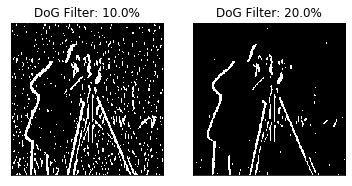

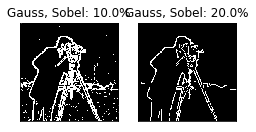

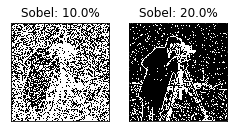

In [63]:
# ==================================================
# Derivative of Gaussian with 10% and 20% Thresholds
# ==================================================

img_path = "gaussian_cameraman.png"
thresholds = [0.1, 0.2]

# Creating the Derivative of Gaussian Kernels 
temp = cv2.getGaussianKernel(7, -1)
gauss = np.outer(temp, temp.transpose())

dog_x = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)
dog_y = cv2.Sobel(gauss, cv2.CV_64F, 0, 1, ksize=3)

# Apply it to image 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
filtered = cv2.filter2D(img, -1, dog_x)

p_max = np.max(filtered)

for i, f in enumerate(thresholds):
    
    ret,thresh = cv2.threshold(filtered, f*p_max, 255, cv2.THRESH_BINARY)

    plt.subplot(120+i+1),plt.imshow(thresh, cmap="gray")
    plt.title("DoG Filter: {}%".format(f*100)), plt.xticks([]), plt.yticks([])

plt.show()

# ==================================================
# Gaussian then Sobel with 10% and 20% Thresholds
# ==================================================

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

gauss = cv2.GaussianBlur(img, (5,5), 0)

I_x = cv2.Sobel(gauss, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(gauss, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)


p_max = np.max(dog_m)

for i, f in enumerate(thresholds):
    ret,thresh = cv2.threshold(I_m, f*p_max, 255, cv2.THRESH_BINARY)

    plt.subplot(130+i+1),plt.imshow(thresh, cmap="gray")
    plt.title("Gauss, Sobel: {}%".format(f*100)), plt.xticks([]), plt.yticks([])

plt.show()


# ==================================================
# Sobel Only with 10% and 20% Thresholds
# ==================================================

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)


p_max = np.max(dog_m)

for i, f in enumerate(thresholds):
    ret,thresh = cv2.threshold(I_m, f*p_max, 255, cv2.THRESH_BINARY)

    plt.subplot(130+i+1),plt.imshow(thresh, cmap="gray")
    plt.title("Sobel: {}%".format(f*100)), plt.xticks([]), plt.yticks([])

plt.show()

#### Question 4: State your observations about the differences/similarities in the above three results
We note that both the Derivative of Gaussian filter and Gauss-Sobel combination have a signficant denoising (Gaussian filter) operation. As such, we can note significantly less noise in these two outputs than the last. We note that the first is detecting vertical edges as we have applied a X-Sobel operation on the Gaussian Kernel, whereas the other two are attempting to detect edges regardless of orientation (by taking magnitude). 

## 6. Canny Edge Detection
#### Question 1:

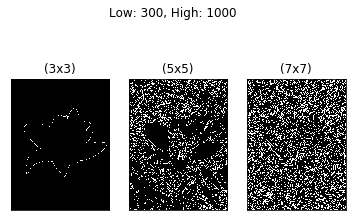

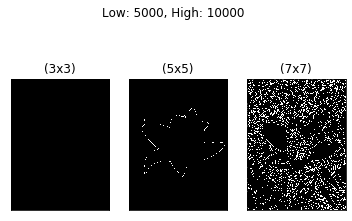

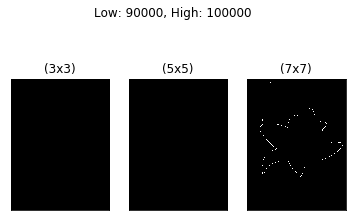

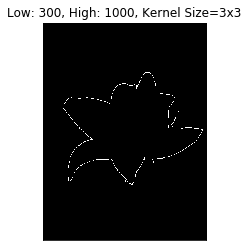

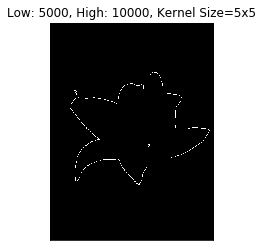

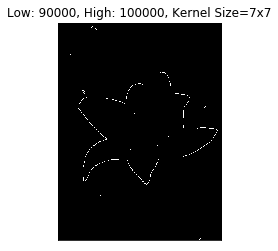

In [73]:
img_path = "yellowlily.png"

lowerbounds = [300, 5000, 90000 ]
upperbounds = [1000, 10000, 100000]
kernel = [3, 5, 7]

# load image as gray-scaled
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


for subset in zip(lowerbounds, upperbounds):
    for i, k in enumerate(kernel):
        lo = subset[0]
        hi = subset[1]
        
        I_edge = cv2.Canny(img, lo, hi, apertureSize=k)
        plt.subplot(130+ i+1), plt.imshow(I_edge, cmap="gray")
        plt.title("({}x{})".format(k, k)), plt.xticks([]), plt.yticks([])
    
    plt.suptitle("Low: {}, High: {}".format(lo, hi))
    plt.show()

#Low: 300, High: 1000, Aperture Size: 3
I_edge = cv2.Canny(img, 300, 1000, apertureSize=3)
plt.title("Low: {}, High: {}, Kernel Size={}x{}".format(300, 1000, 3, 3))
plt.imshow(I_edge, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#Low: 5000, High: 10000, Aperture Size: 5
I_edge = cv2.Canny(img, 5000, 10000, apertureSize=5)
plt.title("Low: {}, High: {}, Kernel Size={}x{}".format(5000, 10000, 5, 5))
plt.imshow(I_edge, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#Low: 90000, High: 100000, Aperture Size: 5
I_edge = cv2.Canny(img, 90000, 100000, apertureSize=7)
plt.title("Low: {}, High: {}, Kernel Size={}x{}".format(90000, 100000, 7, 7))
plt.imshow(I_edge, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

#### Question 2: Comment on how changing values of kernel size, lower and upper thresholds affect the overall edge detection
A higher value for kernel size may denoise the image more, increasing the neighbourhood regarded for each pixel in the gaussian pre-processing, this may lead edges to become less defined (although above, we note that the main edges of the lily object are still well defined. 

A higher value for lower threshold means that we discount many pixels from even being regarded as part of an edge, this reduces the chance that non edge pixels be picked up, but also increases the chance that we do not take into account pixels that are part of the desired edge.

A higher value for higher threshold means that we discount many pixels from being targetted for edge completion during hysteresis, this may result in edges appearing as dotted / incomplete. 